In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
# first half + second half = sparsity, density, n_vars
# envs : envs
# samples : sample_size

EXPERIMENT = 'pairwise_power'

dfs = []
for tag in ['paper_subset_v2', 'envs_supp']:
    if tag == 'paper_subset_v2':
        df = pd.read_csv(f'./results/{EXPERIMENT}_results_{tag}.csv', sep=',', engine='python')
    else:
        df = pd.read_csv(f'./results/{EXPERIMENT}_results_{tag}.csv', sep=', ', engine='python')
#     if len(dfs) > 0:
#         df['params_index'] += dfs[-1]['params_index'].max() + 1
    if tag == 'envs_supp':
        df['params_index'] += 18
#     else:
#         df['params_index'].loc[df['params_index'] >= 17] += 1
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# df.to_csv(f'./results/{EXPERIMENT}_results_paper.csv', sep=', ', index=False)

# tag = '_paper_subset_v2'

# df = pd.read_csv(f'./results/{EXPERIMENT}_results{tag}.csv', sep=',', engine='python')

In [12]:
df[df['params_index'] == 17]

,params_index,n_variables,n_total_environments,sparsity,intervention_targets,sample_size,dag_density,reps,data_simulator,dag_simulator,...,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
37800,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,10,8,8,4,4,0.00,0.0,1.0,0.00,0.00
37801,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,10,8,8,4,4,0.00,0.0,1.0,0.00,0.00
37802,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,10,2,8,4,4,0.75,0.0,1.0,0.75,0.75
37803,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,10,2,8,4,4,0.75,0.0,1.0,0.75,0.75
37804,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,10,6,8,4,4,0.25,0.0,1.0,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,49,4,4,5,3,0.40,0.0,1.0,0.40,0.40
39476,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,49,3,4,5,3,0.60,0.0,1.0,0.60,0.71
39477,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,49,3,4,5,3,0.60,0.0,1.0,0.60,0.71
39478,17,6,3,0.333333,None,2000,0.3,40,cdnod,er,...,49,1,4,5,3,0.80,0.2,0.8,0.80,0.75


In [13]:
print('NA precisions: ', np.sum(1-df['Precision'].notna()))
df = df.loc[df['Precision'].notna(), :]

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

# plot_df = df.melt(
#     id_vars=[
#         'params_index', 'n_variables', 'n_total_environments', 'sparsity', 'Fraction of shifting mechanisms',
#         'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
#         'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
#     # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
#     value_vars=['Precision', 'Recall'], #'Average precision'],
#     var_name='Metric',
#     value_name='Average fraction',
# )

x_var_rename_dict = {
    'sample_size': '# Samples',
    'Number of environments': '# Environments',
    'Fraction of shifting mechanisms': 'Shift fraction',
    'dag_density': 'Edge density',
    'n_variables': '# Variables',
}

plot_df = df.rename(
        x_var_rename_dict, axis=1
    ).rename(
        {'Method': r'$\bf{Test}$', 'Soft': r'$\bf{Score}$'}, axis=1
    ).replace(
        {
            'er': 'Erdos-Renyi',
            'ba': 'Hub',
            'PC (pool all)': 'Full PC (oracle)',
            'Full PC (KCI)': r'Pooled PC (KCI) [25]',
            'Min changes (oracle)': 'MSS (oracle)',
            'Min changes (KCI)': 'MSS (KCI)',
            'Min changes (GAM)': 'MSS (GAM)',
            'Min changes (Linear)': 'MSS (Linear)',
            'Min changes (FisherZ)': 'MSS (FisherZ)',
            'MC': r'MC [11]',
            False: 'Hard',
            True: 'Soft',
        }
)

NA precisions:  0


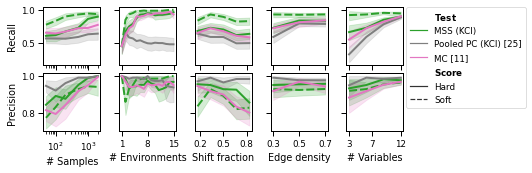

In [14]:
sns.set_context('paper')

grid_vars = list(x_var_rename_dict.values())
metrics = ['Recall', 'Precision']#, 'Average precision']

n_settings = [5, 3, 4, 6, 1]

indices = [
    (a, b) for a, b in zip(np.cumsum([0] + n_settings)[:-1], np.cumsum(n_settings))
]
indices = indices[-2:] + indices[:-2]

# for graph_model in plot_df['dag_simulator'].unique():
fig, axes = plt.subplots(
    len(metrics),
    len(grid_vars),
    sharey='row', sharex='col',
    figsize=(1.5*len(grid_vars), 2.5)
)

for row, metric in zip(axes, metrics):
# for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
    for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
        plot_df_ax = plot_df[
                (plot_df['params_index'] >= lb)
                & (plot_df['params_index'] < ub)
                # & (plot_df['dag_simulator'] == graph_model)
                # 'Min changes (Linear)' 
                & (~plot_df[r'$\bf{Test}$'].isin([
                    'Full PC (oracle)',
                    'MSS (oracle)',
                    'MSS (GAM)',
                    'MSS (FisherZ)',
                    'MSS (Linear)'
                ]))
                # & (plot_df['Score'] == 'Hard')
            ]
        plot_df_ax = pd.concat(
            (
                plot_df_ax[plot_df_ax[r'$\bf{Score}$'] == 'Hard'],
                plot_df_ax[(plot_df_ax[r'$\bf{Score}$'] == 'Soft') & (plot_df_ax[r'$\bf{Test}$'] == 'MSS (KCI)')]
            ),
            ignore_index=True
        )
        
#         ours_idx = (plot_df_ax['Test'] == 'MSS (KCI)')
#         plot_df_ax.loc[ours_idx, 'Test'] = plot_df_ax.loc[ours_idx, 'Test'] + '[' + \
#             plot_df_ax.loc[ours_idx, 'Score'] + ']'
        
#         plot_df_ax = plot_df_ax[plot_df['Score'] == 'Hard']
        
        if g_var != '# Environments':
            plot_df_ax = plot_df_ax[
                # IMPORTANT! otherwise average over all number of environments
                plot_df_ax['# Environments'] == plot_df_ax['# Environments'].max()
            ]

        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y=metric,
            hue=r'$\bf{Test}$',
            style=r'$\bf{Score}$',
            ax=ax,
            palette=[
                sns.color_palette("tab10")[i]
                for i in [2, 7, 6] # 3, 4, 5, 
            ],
            # markers=['d', 'P', 's'],
            # palette='Set1',
            legend='full',
            style_order=['Hard', 'Soft'],
            # alpha=1,
            # ci=None,
            lw=2,
        )
        
        xmin = plot_df_ax[g_var].min()
        xmax = plot_df_ax[g_var].max()
        if xmax > 1:
            ax.set_xticks([
                xmin,
                int(xmin + (xmax - xmin) / 2),
                # int(xmin + 2 * (xmax - xmin) / 3),
                xmax,
            ])
        else:
            ax.set_xticks([
                np.round(xmin, 1),
                np.round(xmin + (xmax - xmin) / 2 , 1),
                # np.round(xmin + 2 * (xmax - xmin) / 3 , 1),
                np.round(xmax, 1),
            ])
        

        # ax.axvline(0.05, ls=':', c='grey')
        # ax.set_title('')
        # ax.legend(loc='upper right')
leg_idx = 4
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# from matplotlib.ticker import ScalarFormatter

# formatter = ScalarFormatter()
# formatter.set_scientific(False)
# # axis.set_major_formatter(formatter)
    
# axes[0, 0].set_yscale('log')
# # axes[0, 0].get_yaxis().set_major_formatter(formatter)
# axes[0, 0].get_yaxis().get_major_formatter().labelOnlyBase = False
# # axes[0, 0].set_yticks([0.5 ,1])
# # axes[0, 0].set_yticklabels([0.5 ,1])

# axes[1, 0].set_yscale('log')
# # axes[1, 0].get_yaxis().set_major_formatter(formatter)
# # axes[1, 0].set_yticklabels([0.8 ,1])

axes = np.concatenate(axes)

for i in range(len(axes)):
    if i == 0:
        axes[i].set_xscale('log')
    if i == leg_idx:
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.setp(axes[i].get_legend().get_title(), fontsize=22)
    else:
        try:
            axes[i].get_legend().remove()
        except:
            pass
        
# plt.ylim([0, 1.03])
# plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
# plt.savefig(f'./figures/empirical_select_rates_er_others.pdf')
plt.show()

## Soft

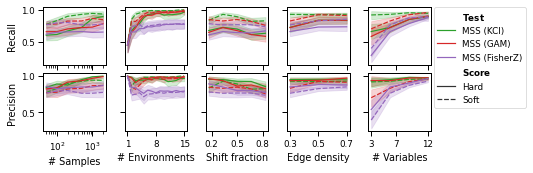

In [15]:
# sns.set_context('paper')

# grid_vars = list(x_var_rename_dict.values())
# metrics = ['Recall', 'Precision']#, 'Average precision']

# n_settings = [5, 3, 4, 6, 1]

# indices = [
#     (a, b) for a, b in zip(np.cumsum([0] + n_settings)[:-1], np.cumsum(n_settings))
# ]
# indices = indices[-1:] + indices[:-1]

# for graph_model in plot_df['dag_simulator'].unique():
fig, axes = plt.subplots(
    len(metrics),
    len(grid_vars),
    sharey='row', sharex='col',
    figsize=(1.5*len(grid_vars), 2.5)
)

for row, metric in zip(axes, metrics):
# for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
    for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
        plot_df_ax = plot_df[
                (plot_df['params_index'] >= lb)
                & (plot_df['params_index'] < ub)
                # & (plot_df['dag_simulator'] == graph_model)
                & (plot_df[r'$\bf{Test}$'].isin(['MSS (KCI)', 'MSS (GAM)', 'MSS (FisherZ)']))#, 'MC']))
                # & (plot_df['Soft'] == False)
        ]
        
        if g_var != '# Environments':
            plot_df_ax = plot_df_ax[
                # IMPORTANT! otherwise average over all number of environments
                plot_df_ax['# Environments'] == plot_df_ax['# Environments'].max()
            ]
        
        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y=metric,
            hue=r'$\bf{Test}$',
            style=r'$\bf{Score}$',
            ax=ax,
            palette=[
                sns.color_palette("tab10")[i]
                for i in [2, 3, 4]
            ],
            # markers=['d', 'P', 's'],
            # palette='Set1',
            legend='full',
            # alpha=1,
            style_order=['Hard', 'Soft'],
        )
        
        xmin = plot_df_ax[g_var].min()
        xmax = plot_df_ax[g_var].max()
        if xmax > 1:
            ax.set_xticks([
                xmin,
                int(xmin + (xmax - xmin) / 2),
                # int(xmin + 2 * (xmax - xmin) / 3),
                xmax,
            ])
        else:
            ax.set_xticks([
                np.round(xmin, 1),
                np.round(xmin + (xmax - xmin) / 2 , 1),
                # np.round(xmin + 2 * (xmax - xmin) / 3 , 1),
                np.round(xmax, 1),
            ])

        # ax.axvline(0.05, ls=':', c='grey')
        # ax.set_title('')
        # ax.legend(loc='upper right')
        
leg_idx = 4
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes = np.concatenate(axes)
for i in range(len(axes)):
    if i == 0:
        axes[i].set_xscale('log')
    if i == leg_idx:
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        axes[i].get_legend().remove()

# plt.ylim([0, 1.03])

# plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
# plt.savefig(f'./figures/empirical_select_rates_er_ours.pdf')
plt.show()